# A Simple Classification Model on Fruits

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl

## EDA

In [2]:
# Read Data and check few rows
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# since it is small dataset, check all rows
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
# Table(DataFrame) size
fruits.shape

(59, 7)

In [5]:
# DataFrame info
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [6]:
# check for any missing values
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [7]:
# Finding Unique Fruits Name & Counts
print('Unique Fruits: \n', fruits['fruit_name'].nunique())
print('-----------------------------------------')
print('Fruits Names: \n',fruits['fruit_name'].unique())
print('-----------------------------------------')
print('Fruits Counts: \n',fruits['fruit_name'].value_counts())
print('-----------------------------------------')
#print(fruits.groupby('fruit_name').size())

Unique Fruits: 
 4
-----------------------------------------
Fruits Names: 
 ['apple' 'mandarin' 'orange' 'lemon']
-----------------------------------------
Fruits Counts: 
 orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64
-----------------------------------------


## Visualiztions

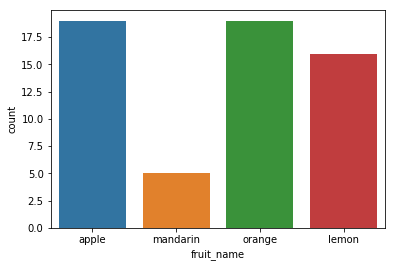

In [8]:
sns.countplot(fruits['fruit_name'])
plt.show()

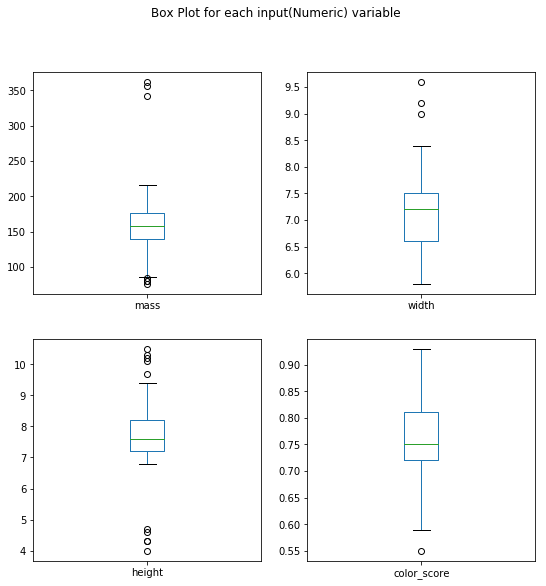

In [9]:
# Box Plots: For each numeric variable will give idea of the distribution of the input variables.
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input(Numeric) variable')
plt.savefig('FRUITS - BOX PLOTS')
plt.show()

###### looks like perhaps color score has a near Gaussian distribution

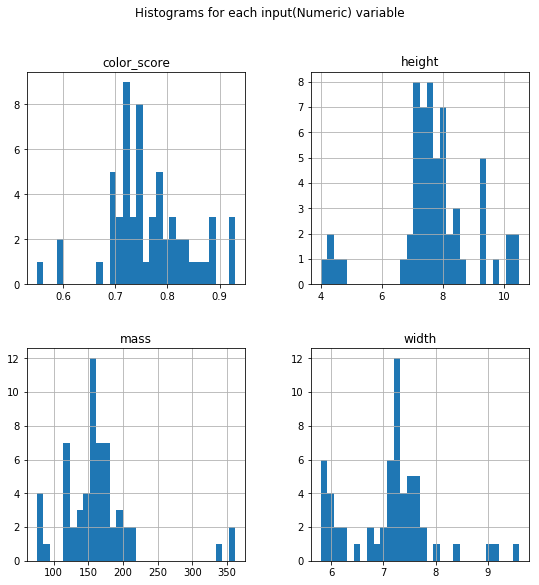

In [10]:
# Histograms : For each numeric variable will give idea of the distribution of the input variables.
fruits.drop(['fruit_label'], axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle('Histograms for each input(Numeric) variable')
plt.savefig('FRUITS - HISTOGRAMS')
plt.show()

###### Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship

C:\Users\750010524\ANACONDAinstall\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


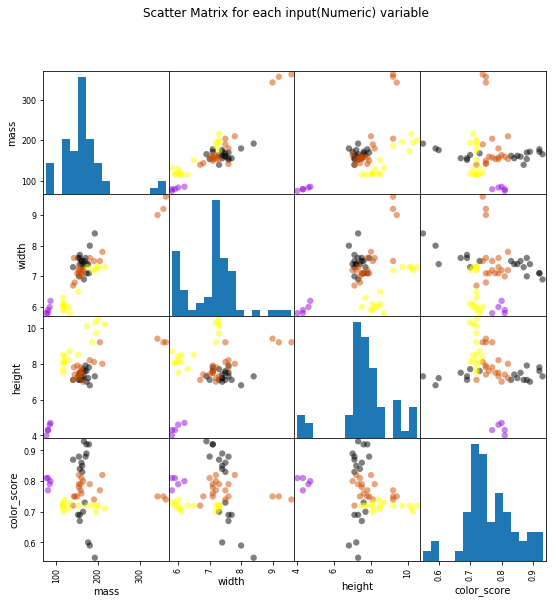

In [11]:
# scatter matrix
from pandas.plotting import scatter_matrix
from matplotlib import cm

features_names = ['mass', 'width', 'height', 'color_score']
X = fruits[features_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15,}, figsize=(9,9), cmap=cmap)
plt.suptitle('Scatter Matrix for each input(Numeric) variable')
plt.savefig('FRUITS - Scatter Matrix')

In [12]:
# DataFrame Stats
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


###### Numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set

## Create Training and Test Sets and Apply Scaling

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

C:\Users\750010524\ANACONDAinstall\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\750010524\ANACONDAinstall\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Build Models

### 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Logistic Regression Accuracy on Traning Set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Logistic Regression Accuracy on Test Set   : {:.2f}'.format(logreg.score(X_test, y_test)))

Logistic Regression Accuracy on Traning Set: 0.70
Logistic Regression Accuracy on Test Set   : 0.40


C:\Users\750010524\ANACONDAinstall\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\750010524\ANACONDAinstall\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


##### Accuracy of Logistic regression classifier on training set: 0.70 
##### Accuracy of Logistic regression classifier on test set: 0.40

### 2. Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)

print('Decision Tree Accuracy on Traning Set: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Decision Tree Accuracy on Test Set: {:.2f}'.format(dtc.score(X_test, y_test)))

Decision Tree Accuracy on Traning Set: 1.00
Decision Tree Accuracy on Test Set: 0.60


##### Accuracy of Decision Tree classifier on training set: 1.00
##### Accuracy of Decision Tree classifier on test set: 0.63

### 3. K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('K-NN Accuracy on Traning Set: {:.2f}'.format(knn.score(X_train, y_train)))
print('K-NN Accuracy on Test Set: {:.2f}'.format(knn.score(X_test, y_test)))

K-NN Accuracy on Traning Set: 0.95
K-NN Accuracy on Test Set: 0.80


##### Accuracy of K-NN classifier on training set: 0.95
##### Accuracy of K-NN classifier on test set: 0.80

### 4. Linear Discriminant Analysis

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('LDA Accuracy on Traning Set: {:.2f}'.format(lda.score(X_train, y_train)))
print('LDA Accuracy on Test Set: {:.2f}'.format(lda.score(X_test, y_test)))

LDA Accuracy on Traning Set: 0.86
LDA Accuracy on Test Set: 0.73


##### Accuracy of Linear Discriminant Analysis on training set: 0.86
##### Accuracy of Linear Discriminant Analysis on test set: 0.73

### 5.Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('GNB Accuracy on Traning Set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('GNB Accuracy on Test Set: {:.2f}'.format(gnb.score(X_test, y_test)))

GNB Accuracy on Traning Set: 0.86
GNB Accuracy on Test Set: 0.47


##### Accuracy of GNB Classifier on training set: 0.86
##### Accuracy of GNB Classifier on test set: 0.47

### 6. Support Vector Machine

In [19]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print('SVM Accuracy on Traning Set: {:.2f}'.format(svm.score(X_train, y_train)))
print('SVM Accuracy on Test Set: {:.2f}'.format(svm.score(X_test, y_test)))

SVM Accuracy on Traning Set: 0.61
SVM Accuracy on Test Set: 0.40


C:\Users\750010524\ANACONDAinstall\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Accuracy of SVM Classifier on training set: 0.61
##### Accuracy of SVM Classifier on test set: 0.40

###### The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set is very small.

In [20]:
# Check the other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)

print('Confusion Matric \n',confusion_matrix(y_test, y_pred))
print('------------------------------------------------------------------')
print('classification Report \n',classification_report(y_test, y_pred))
print('------------------------------------------------------------------')
print('Accuracy Score \n', accuracy_score(y_test, y_pred))
print('------------------------------------------------------------------')

Confusion Matric 
 [[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [0 0 0 2]]
------------------------------------------------------------------
classification Report 
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.67      1.00      0.80         2

   micro avg       0.80      0.80      0.80        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.87      0.80      0.80        15

------------------------------------------------------------------
Accuracy Score 
 0.8
------------------------------------------------------------------


######  ::add later  : Decesion Boundary of the KNN Classider

### As per Models tried above, K-NN Classifier has highest Accuracy